<a href="https://colab.research.google.com/github/WashburnebATWIT/FinalReportNBAData/blob/main/FINALREPORT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NBA DRAFT DATA (1989-2021) ANALYSIS
## Bradford Washburne

In [5]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

Creating the Data Frame

In [6]:
file_path = 'nbaplayersdraft.csv'
# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)
df

,id,year,rank,overall_pick,team,player,college,years_active,games,minutes_played,...,3_point_percentage,free_throw_percentage,average_minutes_played,points_per_game,average_total_rebounds,average_assists,win_shares,win_shares_per_48_minutes,box_plus_minus,value_over_replacement
0,1,1989,1,1,SAC,Pervis Ellison,Louisville,11.0,474.0,11593.0,...,0.050,0.689,24.5,9.5,6.7,1.5,21.8,0.090,-0.5,4.4
1,2,1989,2,2,LAC,Danny Ferry,Duke,13.0,917.0,18133.0,...,0.393,0.840,19.8,7.0,2.8,1.3,34.8,0.092,-0.9,4.9
2,3,1989,3,3,SAS,Sean Elliott,Arizona,12.0,742.0,24502.0,...,0.375,0.799,33.0,14.2,4.3,2.6,55.7,0.109,0.2,13.5
3,4,1989,4,4,MIA,Glen Rice,Michigan,15.0,1000.0,34985.0,...,0.400,0.846,35.0,18.3,4.4,2.1,88.7,0.122,0.8,24.9
4,5,1989,5,5,CHH,J.R. Reid,UNC,11.0,672.0,15370.0,...,0.135,0.716,22.9,8.5,5.0,1.0,22.5,0.070,-2.9,-3.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1917,1918,2021,56,56,CHO,Scottie Lewis,Florida,1.0,2.0,7.0,...,NaN,0.500,3.5,0.5,0.0,0.5,0.0,0.164,6.0,0.0
1918,1919,2021,57,57,CHO,Balša Koprivica,Florida State,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1919,1920,2021,58,58,NYK,Jericho Sims,Texas,1.0,41.0,555.0,...,NaN,0.414,13.5,2.2,4.1,0.5,1.5,0.128,-1.7,0.0
1920,1921,2021,59,59,BRK,RaiQuan Gray,Florida State,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1922 entries, 0 to 1921
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         1922 non-null   int64  
 1   year                       1922 non-null   int64  
 2   rank                       1922 non-null   int64  
 3   overall_pick               1922 non-null   int64  
 4   team                       1922 non-null   object 
 5   player                     1922 non-null   object 
 6   college                    1585 non-null   object 
 7   years_active               1669 non-null   float64
 8   games                      1669 non-null   float64
 9   minutes_played             1669 non-null   float64
 10  points                     1669 non-null   float64
 11  total_rebounds             1669 non-null   float64
 12  assists                    1669 non-null   float64
 13  field_goal_percentage      1665 non-null   float

Changing any numerical columns with NaN to 0

In [8]:
numerical_columns = df.select_dtypes(include='number').columns
df[numerical_columns] = df[numerical_columns].fillna(0)

# Question 1: How do first overall picks compare in performance metrics to other picks?

Scatter plot with regression line for first overall picks

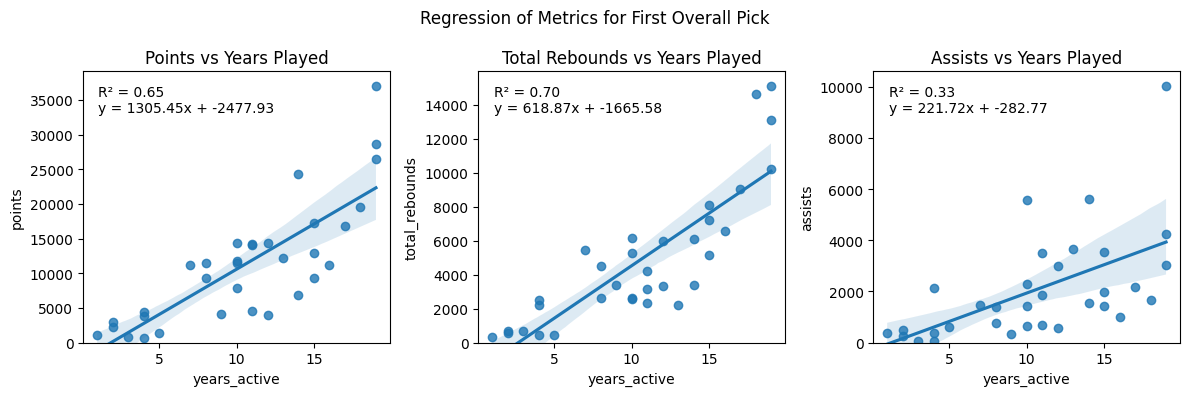

In [10]:
first_overall_picks = df[df['overall_pick'] == 1]
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
fig.suptitle('Regression of Metrics for First Overall Pick')

# Scatter plot for Points vs Years Played with Regression Line
ax = sns.regplot(x='years_active', y='points', data=first_overall_picks, ax=axes[0])
ax.set_title('Points vs Years Played')
ax.set_ylim(bottom=0)

# Regression line parameters
slope, intercept, r_value, p_value, std_err = linregress(first_overall_picks['years_active'], first_overall_picks['points'])
r_squared = r_value**2
equation = 'y = {:.2f}x + {:.2f}'.format(slope, intercept)
ax.annotate('R² = {:.2f}\n{}'.format(r_squared, equation), xy=(0.05, 0.95), xycoords='axes fraction', ha='left', va='top')

# Scatter plot for Total Rebounds vs Years Played with Regression Line
ax = sns.regplot(x='years_active', y='total_rebounds', data=first_overall_picks, ax=axes[1])
ax.set_title('Total Rebounds vs Years Played')
ax.set_ylim(bottom=0)

# Regression line parameters
slope, intercept, r_value, p_value, std_err = linregress(first_overall_picks['years_active'], first_overall_picks['total_rebounds'])
r_squared = r_value**2
equation = 'y = {:.2f}x + {:.2f}'.format(slope, intercept)
ax.annotate('R² = {:.2f}\n{}'.format(r_squared, equation), xy=(0.05, 0.95), xycoords='axes fraction', ha='left', va='top')

# Scatter plot for Assists vs Years Played with Regression Line
ax = sns.regplot(x='years_active', y='assists', data=first_overall_picks, ax=axes[2])  # Changed index to 2
ax.set_title('Assists vs Years Played')
ax.set_ylim(bottom=0)

# Regression line parameters
slope, intercept, r_value, p_value, std_err = linregress(first_overall_picks['years_active'], first_overall_picks['assists'])
r_squared = r_value**2
equation = 'y = {:.2f}x + {:.2f}'.format(slope, intercept)
ax.annotate('R² = {:.2f}\n{}'.format(r_squared, equation), xy=(0.05, 0.95), xycoords='axes fraction', ha='left', va='top')

plt.tight_layout(rect=[0, 0, 1, 1])  # Adjust layout to prevent title overlap
plt.show()

Scatter plot with regression line for non-first overall picks

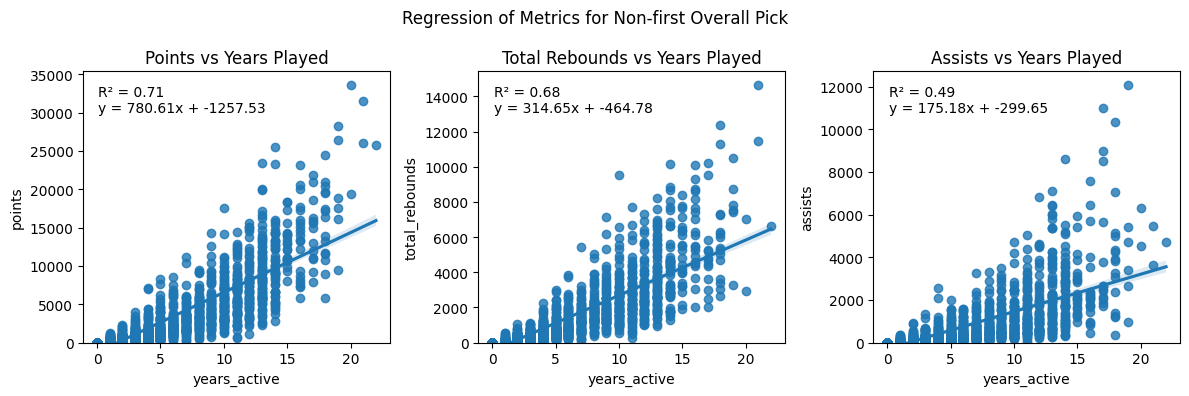

In [20]:
#filtering non-first overall picks
not_first_overall_picks = df[df['overall_pick'] != 1]
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
fig.suptitle('Regression of Metrics for Non-first Overall Pick')

# Scatter plot for Points vs Years Played with Regression Line
ax = sns.regplot(x='years_active', y='points', data=not_first_overall_picks, ax=axes[0])
ax.set_title('Points vs Years Played')
ax.set_ylim(bottom=0)

# Regression line parameters
slope, intercept, r_value, p_value, std_err = linregress(not_first_overall_picks['years_active'], not_first_overall_picks['points'])
r_squared = r_value**2
equation = 'y = {:.2f}x + {:.2f}'.format(slope, intercept)
ax.annotate('R² = {:.2f}\n{}'.format(r_squared, equation), xy=(0.05, 0.95), xycoords='axes fraction', ha='left', va='top')

# Scatter plot for Total Rebounds vs Years Played with Regression Line
ax = sns.regplot(x='years_active', y='total_rebounds', data=not_first_overall_picks, ax=axes[1])
ax.set_title('Total Rebounds vs Years Played')
ax.set_ylim(bottom=0)

# Regression line parameters
slope, intercept, r_value, p_value, std_err = linregress(not_first_overall_picks['years_active'], not_first_overall_picks['total_rebounds'])
r_squared = r_value**2
equation = 'y = {:.2f}x + {:.2f}'.format(slope, intercept)
ax.annotate('R² = {:.2f}\n{}'.format(r_squared, equation), xy=(0.05, 0.95), xycoords='axes fraction', ha='left', va='top')

# Scatter plot for Assists vs Years Played with Regression Line
ax = sns.regplot(x='years_active', y='assists', data=not_first_overall_picks, ax=axes[2])  # Changed index to 2
ax.set_title('Assists vs Years Played')
ax.set_ylim(bottom=0)

# Regression line parameters
slope, intercept, r_value, p_value, std_err = linregress(not_first_overall_picks['years_active'], not_first_overall_picks['assists'])
r_squared = r_value**2
equation = 'y = {:.2f}x + {:.2f}'.format(slope, intercept)
ax.annotate('R² = {:.2f}\n{}'.format(r_squared, equation), xy=(0.05, 0.95), xycoords='axes fraction', ha='left', va='top')


plt.tight_layout(rect=[0, 0, 1, 1])  # Adjust layout to prevent title overlap
plt.show()

# Question 2: How do performance metrics differ by decade?

Line plot for average metrics based on decade

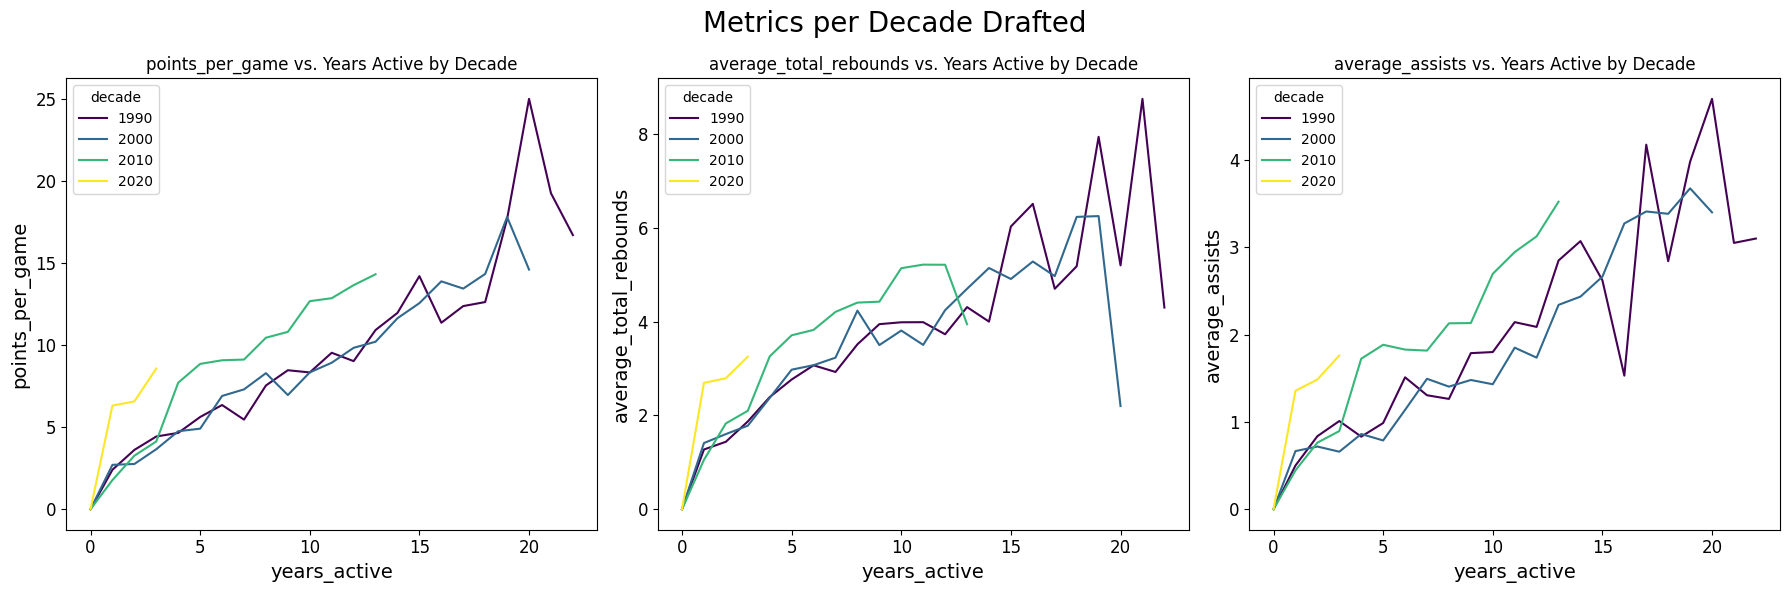

In [14]:
# Create a new column to represent the decade
df['decade'] = (((df['year'] + 1) // 10) * 10)

# Line plots for average stats vs. years_active by decade
plt.figure(figsize=(18, 6))
plt.suptitle('Metrics per Decade Drafted', fontsize = 20)
metrics = ['points_per_game', 'average_total_rebounds', 'average_assists']
# Loop through each metric
for i in range(len(metrics)):
    metric = metrics[i]
    plt.subplot(1, 3, i + 1)

    # Line plot and color by decade
    sns.lineplot(x='years_active', y=metric, hue='decade', data=df, palette='viridis', estimator='mean', err_style=None)
    plt.title(metric + ' vs. Years Active by Decade')

    # Increase font size
    plt.xlabel('years_active', fontsize=14)
    plt.ylabel(metric, fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

# Question 3: What colleges send the most players to the NBA and how do they influence a player's draft position?

Bar graph and box plot based on top 20 colleges

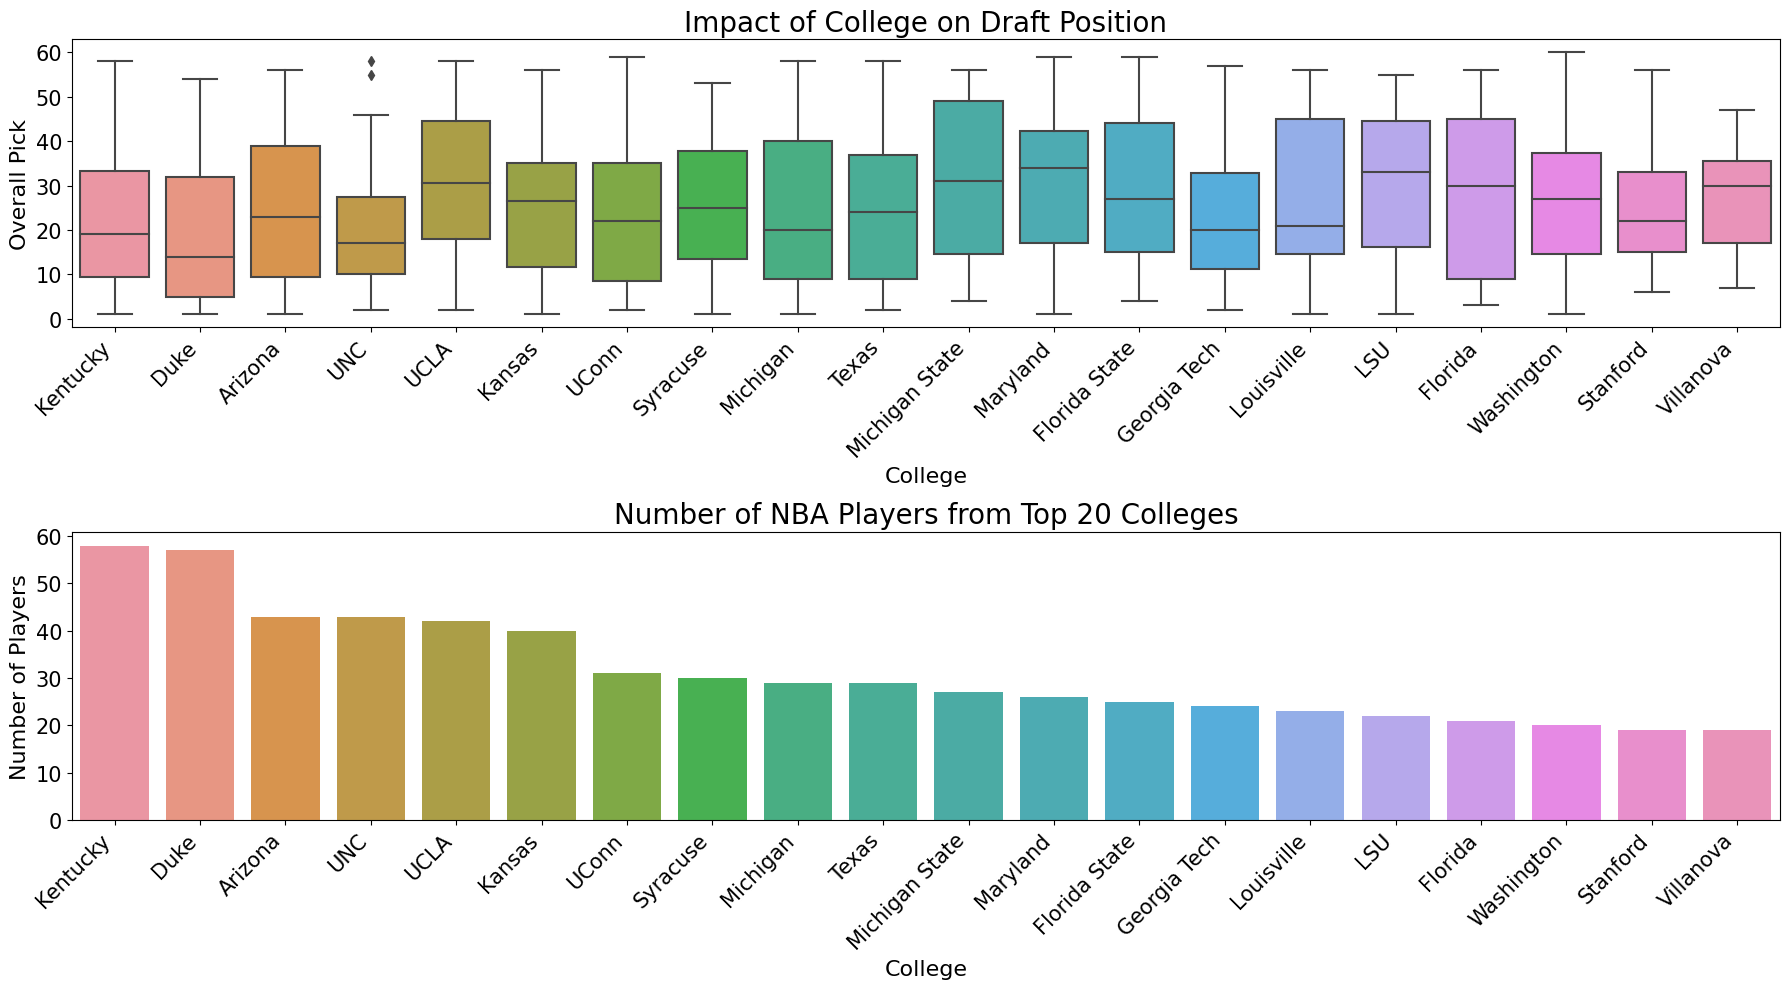

In [15]:
#filtering top 20 colleges
df_cleaned = df.dropna(subset=['college'])
top_colleges = df_cleaned['college'].value_counts().index[:20]
plt.figure(figsize=(18, 10))

# Subplot 1: Box plot for draft position by college
plt.subplot(2, 1, 1)
sns.boxplot(x='college', y='overall_pick', data=df_cleaned, order=top_colleges)

#Increase font size
plt.xticks(rotation=45, ha='right', fontsize =15)
plt.yticks(fontsize = 15)
plt.title('Impact of College on Draft Position', fontsize = 20)
plt.xlabel('College', fontsize = 16)
plt.ylabel('Overall Pick', fontsize =16)

# Subplot 2: Bar plot for the number of NBA players from the top 20 colleges
plt.subplot(2, 1, 2)
sns.countplot(x='college', data=df_cleaned, order=top_colleges)

#Increase fontsize
plt.xticks(rotation=45, ha='right', fontsize =15)
plt.yticks(fontsize = 15)
plt.title('Number of NBA Players from Top 20 Colleges', fontsize = 20)
plt.xlabel('College', fontsize =16)
plt.ylabel('Number of Players', fontsize =16)

#display plots
plt.tight_layout()
plt.show()

# Question 4: What are the major contributors to a player's win shares?

Scatter plot with regression line for average metrics vs. win shares

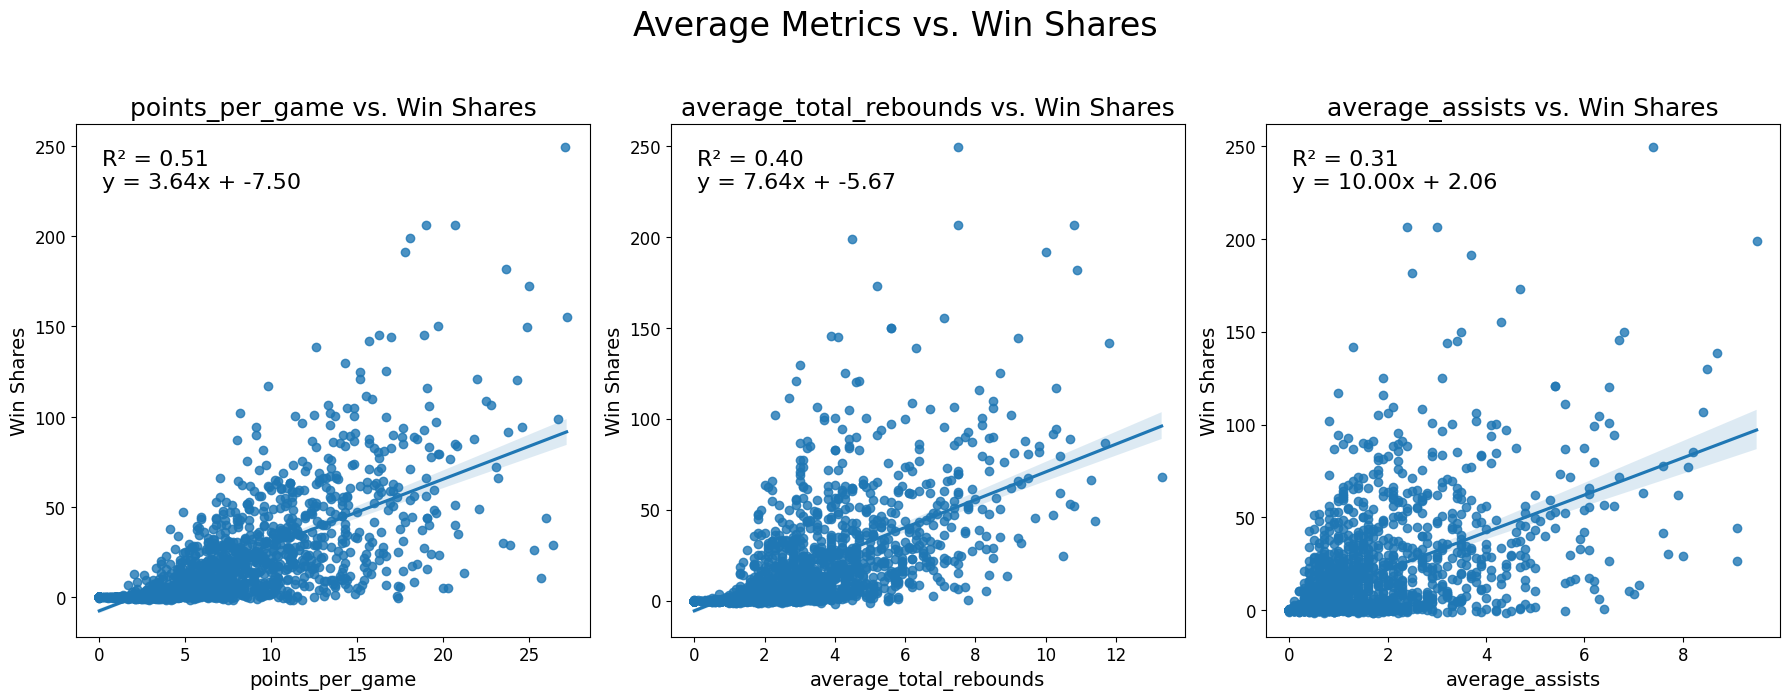

In [17]:
# Scatter plots with regression lines and R² values for average stats
plt.figure(figsize=(18, 12))
metrics = ['points_per_game', 'average_total_rebounds', 'average_assists']

# Loop through each metric
for i in range(len(metrics)):
    metric = metrics[i]
    plt.subplot(2, 3, i + 1)

    # Scatter plot with regression line
    ax = sns.regplot(x=metric, y='win_shares', data=df)

    # Regression line parameters
    slope, intercept, r_value, p_value, std_err = linregress(df[metric], df['win_shares'])
    r_squared = r_value**2

    # Add R^2 label and regression line equation in the top left corner
    equation = 'y = {:.2f}x + {:.2f}'.format(slope, intercept)
    ax.annotate('R² = {:.2f}\n{}'.format(r_squared, equation), xy=(0.05, 0.95), xycoords='axes fraction', ha='left', va='top', fontsize = 16)

    # Increase fontsize
    plt.title(metric + ' vs. Win Shares', fontsize=18)
    plt.xlabel(metric, fontsize=14)
    plt.ylabel('Win Shares', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

plt.suptitle('Average Metrics vs. Win Shares', fontsize = 24, x=0.5, y=1.02)
plt.tight_layout()
plt.show()

Scatter plot with regression line for total metrics vs. win shares

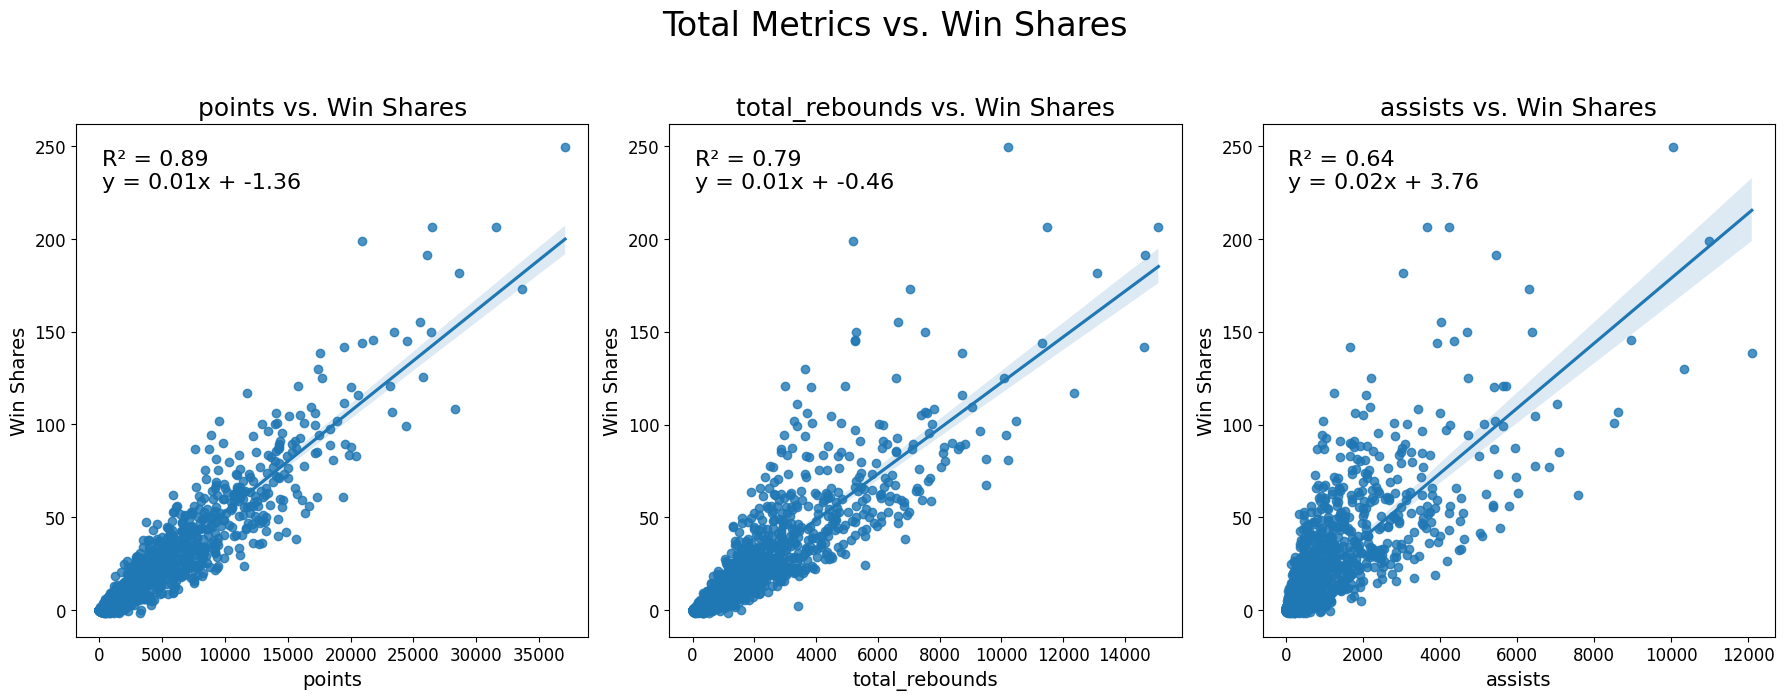

In [ ]:
# Scatter plots with regression lines and R² values for average stats
plt.figure(figsize=(18, 12))


# List of metric variables
metrics = ['points', 'total_rebounds', 'assists']

# Loop through each metric variable
for i in range(len(metrics)):
    metric = metrics[i]
    plt.subplot(2, 3, i + 1)

    # Scatter plot with regression line
    ax = sns.regplot(x=metric, y='win_shares', data=df)

    # Regression line parameters
    slope, intercept, r_value, p_value, std_err = linregress(df[metric], df['win_shares'])
    r_squared = r_value**2

    # Add R^2 label and regression line equation in the top left corner
    equation = 'y = {:.2f}x + {:.2f}'.format(slope, intercept)
    ax.annotate('R² = {:.2f}\n{}'.format(r_squared, equation), xy=(0.05, 0.95), xycoords='axes fraction', ha='left', va='top', fontsize = 16)

    # Increase fontsize
    plt.title('{} vs. Win Shares'.format(metric), fontsize=18)
    plt.xlabel(metric, fontsize=14)
    plt.ylabel('Win Shares', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

plt.suptitle('Total Metrics vs. Win Shares', fontsize = 24, x=0.5, y=1.02)
plt.tight_layout()
plt.show()

Scatter plot with regression line for average metrics (fg% and box +/-) vs. win shares

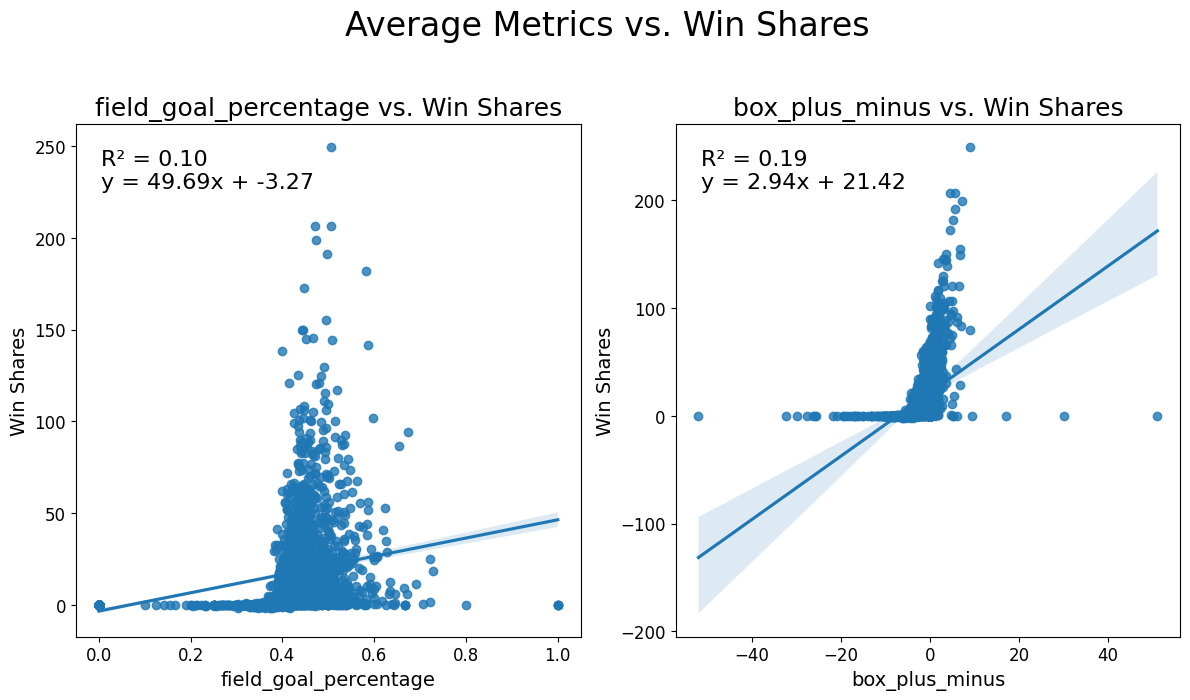

In [ ]:
# Scatter plots with regression lines and R² values
plt.figure(figsize=(18, 12))

# List of metric variables
metrics = ['field_goal_percentage', 'box_plus_minus']

# Loop through each metric variable
for i in range(len(metrics)):
    metric = metrics[i]
    plt.subplot(2, 3, i + 1)

    # Scatter plot with regression line
    ax = sns.regplot(x=metric, y='win_shares', data=df)

    # Regression line parameters
    slope, intercept, r_value, p_value, std_err = linregress(df[metric], df['win_shares'])
    r_squared = r_value**2

    # Add R^2 label and regression line equation in the top left corner
    equation = 'y = {:.2f}x + {:.2f}'.format(slope, intercept)
    ax.annotate('R² = {:.2f}\n{}'.format(r_squared, equation), xy=(0.05, 0.95), xycoords='axes fraction', ha='left', va='top', fontsize=16)


    # Increase fontsize
    plt.title('{} vs. Win Shares'.format(metric), fontsize=18)
    plt.xlabel(metric, fontsize=14)
    plt.ylabel('Win Shares', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

plt.suptitle('Average Metrics vs. Win Shares', fontsize = 24, x=0.34, y=1.02)
plt.tight_layout()
plt.show()


# Question 5: Can a basic predictive model be established for a player's win shares based on their overall pick?

Simple Linear Regression model using pick as independent variable and win shares as dependent

In [ ]:
df_cleaned = df[['win_shares', 'overall_pick', 'college']].dropna()

# Split the data into features (X) and target variable (y)
X = df_cleaned[['overall_pick']]
y = df_cleaned['win_shares']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build and train the linear regression model and make predictions
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Print results
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)
print('Coefficient for overall_pick:', model.coef_[0])

Mean Squared Error: 575.2904013817906
Coefficient for overall_pick: -0.6754578745361193
